In [1]:
import json
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
ann_root = '/home/berkiu/work/formunderstanding/dataset/training_data/annotations'
img_root = '/home/berkiu/work/formunderstanding/dataset/training_data/images'

In [3]:
annotations_js = sorted([os.path.join(ann_root, f) for f in os.listdir(ann_root) if '.json' in f])
images = sorted([os.path.join(img_root, f) for f in os.listdir(img_root) if '.png' in f])

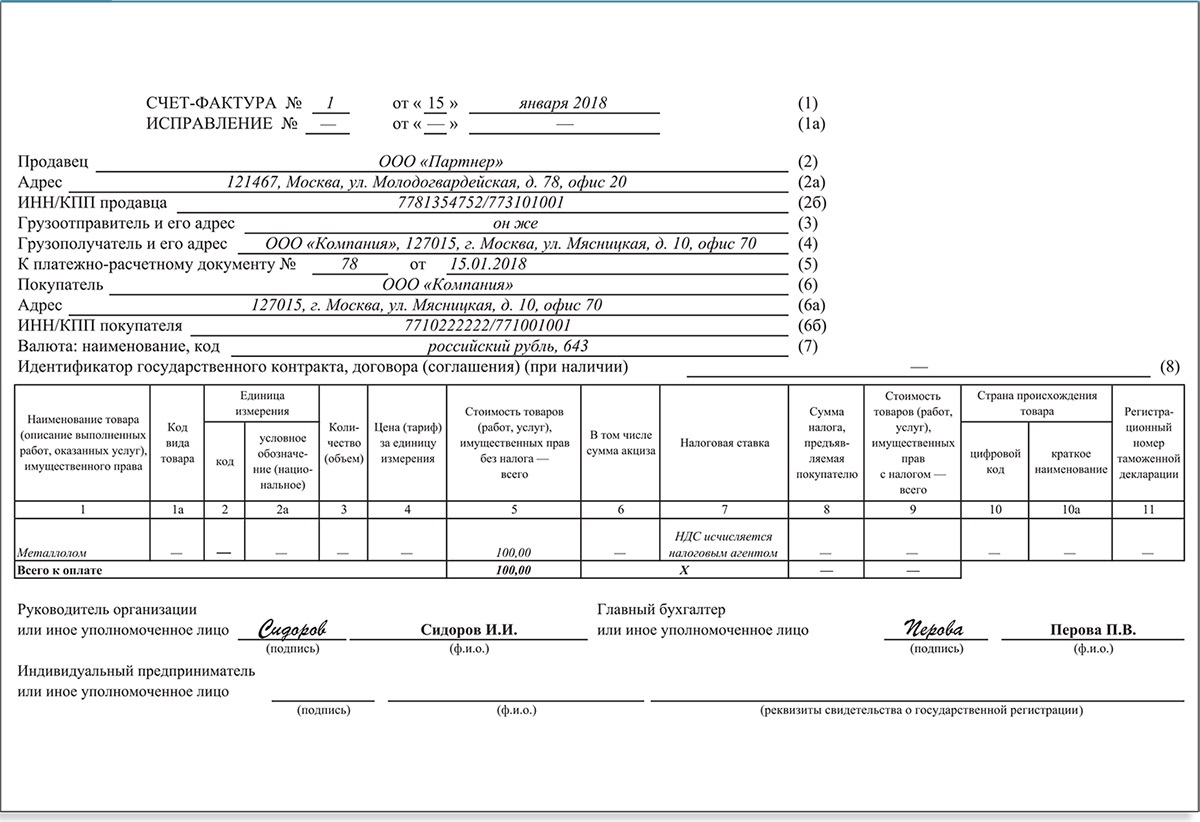

In [4]:
image = Image.open(os.path.join(img_root, 'jmkfj1.png'))
image

In [5]:
colors = {'question': (255, 0, 0), # Red
          'answer': (255, 255, 0), # Yellow
          'other': (0, 255, 0), # Green
          'header': (0, 0, 255)} # Blue

In [6]:
def markup(image, annotations):
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        draw.rectangle(
            (annotation['box'][0],
             annotation['box'][1],
             annotation['box'][2],
             annotation['box'][3]),
            outline=colors[annotation['label']],
            width=2
        )
    return image

In [7]:
images_to_vis = len(images)
#fig = plt.figure(figsize=(14, 100)) 
for i in range(images_to_vis - 3):
    curr_ann = annotations_js[i]
    with open(curr_ann, 'r') as f:
        annotations = json.load(f)
    with Image.open(images[i]).convert("RGBA") as img:
        #ax = plt.subplot(int(images_to_vis / 2), 2, i + 1)
        res = markup(img, annotations['form'])
        #res.save(f'res/{i}.png')
        #ax.imshow(markup(img, annotations['form']))
        #ax.axis('off')
#plt.subplots_adjust(hspace=0, wspace=0)

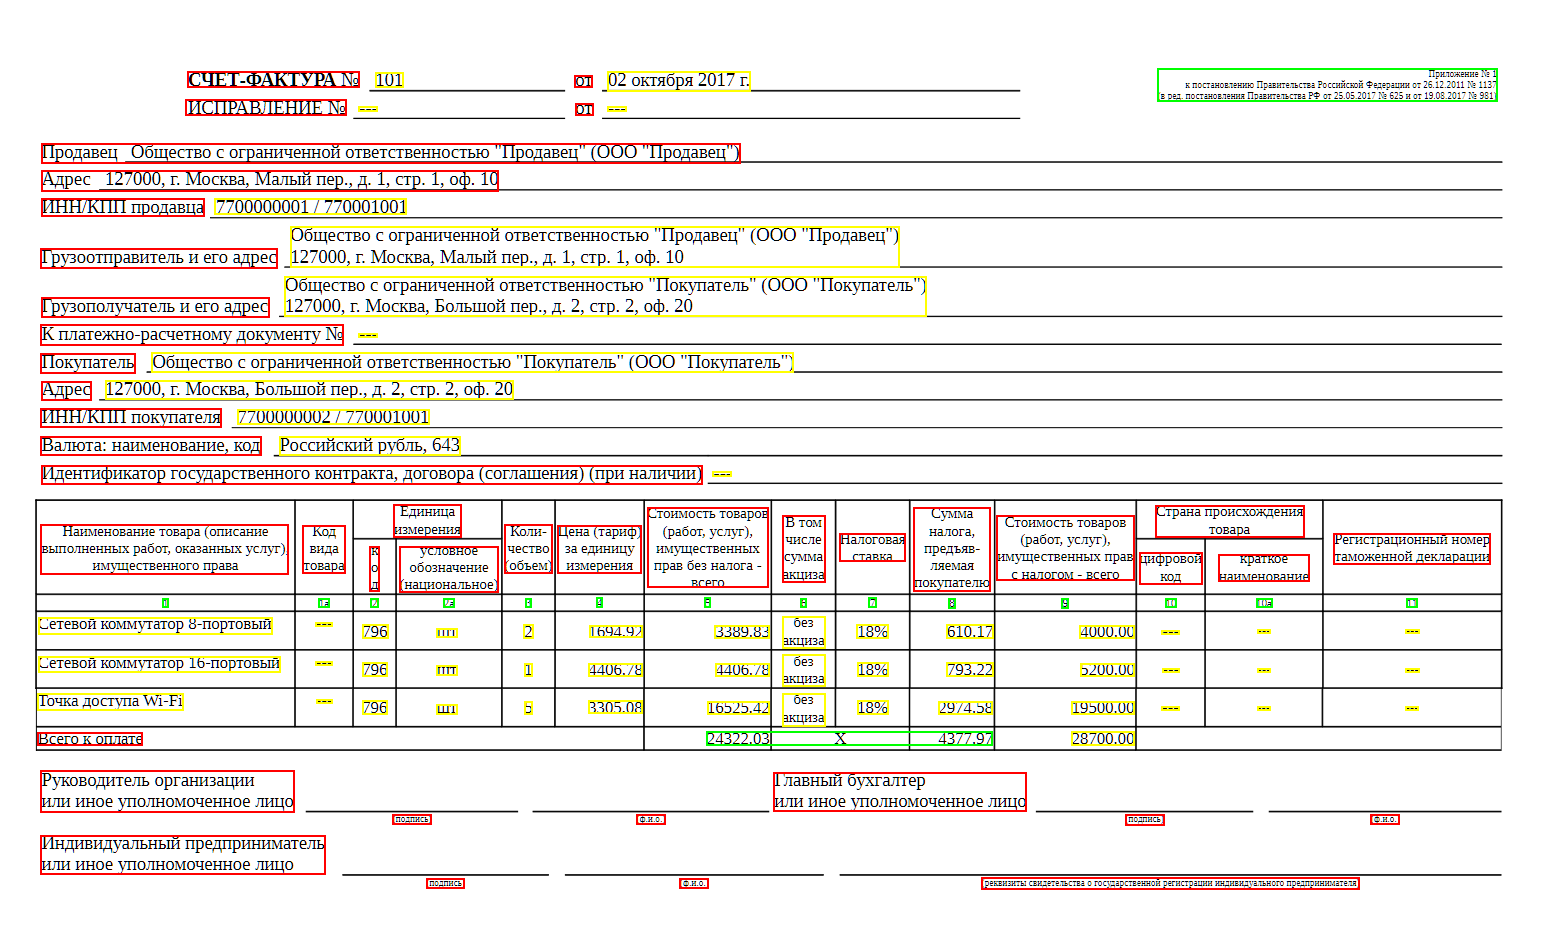

In [8]:
res